Step 1 - Import python libraries

In [1]:
from IPython import get_ipython
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

Step 2 - Load and read your data file
- pyTCR accepts a single `.csv` file that should contain all the samples.
  - The following cell attempts to detect whether you are running the notebook in a Google Colab cloud environment or in a local environment, and then loads the data at the specified path.
- The `filePath` variable in the following code cell should be changed to the location of your file. The following options are supported:
  1. A `filePath` from Google Drive (to run on a cloud environment)
  2. A `filePath` from your local computer (to run on a local environment, other cloud environments should work as expected)
- Adjust the `optional_fields` according to your data

In [2]:
# Specify the path to your data in Google Drive or locally
filePath = "/scratch1/pjaiswal/ipynb_notebooks/master_files/TRUST4_inhouse_all.csv" # or "/content/drive/MyDrive/combined_data.csv"

df = pd.read_csv(filePath, low_memory=False, engine="c")

optional_fields = ['Type']

df.head()

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,Type
0,HD_23_S7_L001_original_TRUST4,0.055397,13245,CASSLGLNEQFF,TGTGCCAGCAGTTTAGGGCTCAATGAGCAGTTCTTC,TRBV28*01,.,TRBJ2-1*01,Original_TRUST4
1,HD_23_S7_L001_original_TRUST4,0.017364,9511,CAIQGAQKLVF,TGTGCAATCCAGGGAGCCCAGAAGCTGGTATTT,TRAV27*01,.,TRAJ54*01,Original_TRUST4
2,HD_23_S7_L001_original_TRUST4,0.015424,8448,CATGAGNTPLVF,TGTGCTACGGGGGCAGGAAACACACCTCTTGTCTTT,TRAV17*01,.,TRAJ29*01,Original_TRUST4
3,HD_23_S7_L001_original_TRUST4,0.014476,7929,CAVTLNTGGFKTIF,TGTGCCGTGACCTTGAATACTGGAGGCTTCAAAACTATCTTT,TRAV12-2*03,.,TRAJ9*01,Original_TRUST4
4,HD_23_S7_L001_original_TRUST4,0.031126,7442,CASSQDGGFHNEQFF,TGCGCCAGCAGCCAAGATGGGGGGTTTCACAATGAGCAGTTCTTC,TRBV4-1*01,TRBD2*01,TRBJ2-1*01,Original_TRUST4


In [4]:
# Create a dataframe with reads count for each sample
df_reads = df.groupby(['sample', 'Type']).agg(
    {'#count': 'sum'}).reset_index().rename(columns={'#count': "count"})

# Create a dataframe with clonotype count for each sample
df_diversity = df.groupby(['sample', 'Type'], sort=False).size().reset_index(name='clonotype_count')

In [5]:
# Add clonotype count of each sample as a column to create a new dataframe
df = pd.merge(df, df_diversity, on=['sample', 'Type'])

df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,Type,clonotype_count
0,HD_23_S7_L001_original_TRUST4,0.055397,13245,CASSLGLNEQFF,TGTGCCAGCAGTTTAGGGCTCAATGAGCAGTTCTTC,TRBV28*01,.,TRBJ2-1*01,Original_TRUST4,384986
1,HD_23_S7_L001_original_TRUST4,0.017364,9511,CAIQGAQKLVF,TGTGCAATCCAGGGAGCCCAGAAGCTGGTATTT,TRAV27*01,.,TRAJ54*01,Original_TRUST4,384986
2,HD_23_S7_L001_original_TRUST4,0.015424,8448,CATGAGNTPLVF,TGTGCTACGGGGGCAGGAAACACACCTCTTGTCTTT,TRAV17*01,.,TRAJ29*01,Original_TRUST4,384986
3,HD_23_S7_L001_original_TRUST4,0.014476,7929,CAVTLNTGGFKTIF,TGTGCCGTGACCTTGAATACTGGAGGCTTCAAAACTATCTTT,TRAV12-2*03,.,TRAJ9*01,Original_TRUST4,384986
4,HD_23_S7_L001_original_TRUST4,0.031126,7442,CASSQDGGFHNEQFF,TGCGCCAGCAGCCAAGATGGGGGGTTTCACAATGAGCAGTTCTTC,TRBV4-1*01,TRBD2*01,TRBJ2-1*01,Original_TRUST4,384986
...,...,...,...,...,...,...,...,...,...,...
13475809,RS_3_JB_shuffle_TRUST4,0.000016,1,out_of_frame,TGTGCTGTGAGTGATCTTAGGCTCTGGCAACACAGGCAACCTAATCTTT,TRAV8-6*01,.,TRAJ37*01,Shuffle_TRUST4,46101
13475810,RS_3_JB_shuffle_TRUST4,0.000016,1,CAASGGNNRLAF,TGTGCAGCAAGTGGAGGGAACAACAGACTCGCTTTT,TRAV13-1*02,.,TRAJ7*01,Shuffle_TRUST4,46101
13475811,RS_3_JB_shuffle_TRUST4,0.000016,1,CAVTIGGGKLIF,TGTGCTGTGACGATCGGGGGAGGAAAGCTTATCTTC,TRAV21*01,.,TRAJ23*01,Shuffle_TRUST4,46101
13475812,RS_3_JB_shuffle_TRUST4,0.000016,1,CATDGSNDYKLSF,TGTGCTACGGATGGGTCTAACGACTACAAGCTCAGCTTT,TRAV17*01,.,TRAJ20*01,Shuffle_TRUST4,46101


Diversity analysis 1 - Shannon-Wiener index [shannon_wiener_index]

In [6]:
df['#count']=pd.to_numeric(df['#count'], errors='coerce')
df['freq']=pd.to_numeric(df['freq'], errors='coerce')

In [7]:
# Calculation step 1
df['shannon_index'] = -(df['freq']*np.log(df['freq']))

# Calculation step 2
df_shannon = df.groupby(['sample', 'Type']).agg(
    {'shannon_index': 'sum'}).reset_index().rename(columns={'': "shannon_index"})

# Calculation step 3, Shannon-Wienex index is shown in the shannon_wiener_index column
df_shannon['shannon_wiener_index'] = np.exp(df_shannon['shannon_index'])
df_shannon_index = df_shannon[['sample', 'Type', 'shannon_wiener_index']]

Diversity analysis 2 - Normalized Shannon-Wiener index [normalized_shannon_wiener_index]

In [8]:
# Calculation step 1 - merge df_shannon and df_diversity (which contains clonotype counts)
df_shannon = pd.merge(df_shannon, df_diversity, on=[
                      'sample', 'Type'])

# Calculation step 2 - calculate normalized Shannon-Wienex index, it is shown in the normalized_shannon_wiener_index column
df_shannon['normalized_shannon_wiener_index'] = df_shannon['shannon_index'] / \
    np.log(df_shannon['clonotype_count'])

df_norm_shannon = df_shannon[['sample', 'Type','shannon_wiener_index', 'normalized_shannon_wiener_index']]

Diversity analysis 3 - Inverse Simpson index [inverse_simpson_index]

In [9]:
# Calculation step 1
df['simpson_index'] = (df['freq']**2)

# Calculation step 2
df_simpson = df.groupby(['sample', 'Type']).agg(
    {'simpson_index': 'sum'}).reset_index().rename(columns={'': "simpson_index"})

# Calculation step 3, Inverse Simpson index is shown in the inverse_simpson_index column
df_simpson['inverse_simpson_index'] = 1/df_simpson['simpson_index']

Diversity analysis 4 - Gini Simpson index [gini_simpson_index]


In [10]:
df_simpson['gini_simpson_index'] = 1-df_simpson['simpson_index']

Diversity analysis 5 - D50 index [D50_index]


In [11]:
# Create an empty dataframe for storing results
df_D50 = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    # Sort the sample clonotypes by frequency in descending order
    df_temp = df_temp.sort_values(by='freq', ascending=False)

    # Create a column to store the order
    df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

    # Compute and store the cumulative sum of the frequencies
    df_temp['accum_freq'] = df_temp['freq'].cumsum()

    # Find out the first accumulated frequency that is above 50%
    df_temp = df_temp.loc[(df_temp['accum_freq'] >= 0.5)
                          & (df_temp['accum_freq'] <= 0.6)]
    df_temp = df_temp.head(1)

    # Calculate D50 index and store in the result dataframe
    df_temp = df_temp.head(1)
    df_temp['D50_index'] = df_temp['clonotype_number'] / \
        df_temp['clonotype_count']*100
    df_D50 = pd.concat([df_D50, df_temp])

df_D50 = df_D50[['sample', 'Type', 'D50_index']]

Diversity analysis 6 - Chao1 estimate [chao1] and standard deviation [chao1_SD]







In [12]:
# Create an empty dataframe for storing results
df_chao1 = pd.DataFrame()

# Get the columns needed for calculation from df
df1 = df[['sample', '#count', 'clonotype_count', 'Type']]

# Create a list of the sample names
samples = set(df1['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df1.loc[df1['sample'] == sample]

    # Count singleton in the sample
    singleton = len(df_temp.loc[df_temp['#count'] == 1])

    # Count doubleton in the sample
    doubleton = len(df_temp.loc[df_temp['#count'] == 2])

    # Calculate Chao1 estimate
    chao1 = int(df_temp['clonotype_count'].values[0]) + \
        ((singleton * (singleton-1))/(2*(doubleton+1)))
    df_temp['chao1'] = chao1

    # Calculate Chao1 estimate standard deviation
    step1 = 1/4*((singleton/doubleton)**4)
    step2 = (singleton/doubleton)**3
    step3 = 1/2*((singleton/doubleton)**2)
    step4 = doubleton * (step1+step2+step3)
    df_temp['chao1_SD'] = step4**(1/2)

    # Store the results in the result dataframe
    df_chao1 = pd.concat([df_chao1, df_temp], axis=0, sort=False)

    # Remove the duplicates results in the result dataframe
    df_chao1 = df_chao1[['sample', 'Type', 'chao1', 'chao1_SD']]
    df_chao1 = df_chao1.drop_duplicates(subset=['sample'], keep='first')

Diversity analysis 7 - Gini coefficient [gini_coefficient]

In [13]:
# Create an empty dataframe for storing results
df_gini = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    def gini(list_of_values):
        sorted_list = sorted(list_of_values)
        height, area = 0, 0
        for value in sorted_list:
            height += value
            area += height - value / 2.
        fair_area = height * len(list_of_values) / 2.
        return (fair_area - area) / fair_area

    # Calculate gini coefficient
    df_temp['gini_coefficient'] = gini(df_temp['freq'])

    # Store the results in the result dataframe
    df_gini = pd.concat([df_gini, df_temp], sort=False)

    # Remove the duplicates results in the result dataframe
    df_gini = df_gini[['sample', 'Type', 'gini_coefficient']]
    df_gini = df_gini.drop_duplicates(subset=['sample'], keep='first')

Diversity analysis 8 - Summary table for the diversity analysis

In [16]:
# Create a dataframe that combines all the diversity analysis
dfs = [df_norm_shannon, df_simpson, df_D50, df_chao1, df_gini]

df_combined = pd.merge(dfs[0], dfs[1], left_on=['sample', 'Type'], right_on=[
                       'sample', 'Type'], how='outer')

for d in dfs[2:]:
    df_combined = pd.merge(df_combined, d, left_on=['sample', 'Type'], right_on=[
                           'sample', 'Type'], how='outer')

df_combined
df_combined.to_csv('/scratch1/pjaiswal/figures/diversity_metrics_TRUST4_inhouse.csv', index=False)

Diversity analysis 9 - Statistical analysis of diversity metrics

Diversity 9.1 - Mean or median of diversity metrics among groups
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median

In [18]:
# Calculate the mean among two groups
df_combined_mean = pd.DataFrame(columns=['Type'])

for column in df_combined[['shannon_wiener_index', 'normalized_shannon_wiener_index', 'inverse_simpson_index', 'gini_simpson_index', 'D50_index', 'chao1', 'gini_coefficient']]:
    df_temp = df_combined.groupby('Type')[
        column].mean().reset_index()
    df_combined_mean = pd.merge(df_combined_mean, df_temp, on=[
                                'Type'], how='right')

df_combined_mean
df_combined_mean.to_csv('/scratch1/pjaiswal/figures/mean_diversity_TRUST4_inhouse.csv', index=False)

In [19]:
# Calculate the median among two groups
df_combined_median = pd.DataFrame(columns=['Type'])
for column in df_combined[['shannon_wiener_index', 'normalized_shannon_wiener_index', 'inverse_simpson_index', 'gini_simpson_index', 'D50_index', 'chao1', 'gini_coefficient']]:
    df_temp = df_combined.groupby('Type')[
        column].median().reset_index()
    df_combined_median = pd.merge(df_combined_median, df_temp, on=[
                                  'Type'], how='right')

df_combined_median

,Type,shannon_wiener_index,normalized_shannon_wiener_index,inverse_simpson_index,gini_simpson_index,D50_index,chao1,gini_coefficient
0,Original_Mixcr,3.506830e+07,1.630265,231.682593,0.995610,1.917199,98311.500902,NaN
1,Shuffle_Mixcr,3.493105e+07,1.630902,231.972209,0.995622,1.930717,98438.482059,NaN


Diversity analysis 9.2 - Test if the certain diversity metric is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)
3.   change the "shannon_wiener_index" to other metrics that you are interested in

In [19]:
x = stats.normaltest(df_combined['shannon_wiener_index'])
x

NormaltestResult(statistic=78.09820911042374, pvalue=1.0994851509945878e-17)

Diversity analysis 9.3 - Stats test
1.  if the dataset is normally distributed, use t-test (stats.ttest_ind)

*   change the group1, group2 to the groups/samples that you are interested in
*   change the "shannon_wiener_index" to other metrics that you are interested in

2.  if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
*   change the "shannon_wiener_index" to other metrics that you are interested in

In [20]:
df_group1 = df_combined[df_combined['Type'] == True]
df_group2 = df_combined[df_combined['Type'] == False]

stats.ranksums(df_group1['shannon_wiener_index'],df_group2['shannon_wiener_index'])

/home1/pjaiswal/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:9154: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

Diversity analysis 10 - Visualization
1.   change x = 'hospitalized' to the diversity index that you are interested
2.   change y = 'shannon_wiener_index' to the index that you desire
3.   change the violin plot (sns.violinplot) to the plot type that you are interested in, includes strip plot (sns.stripplot), swarm plot (sns.swarmplot), box plot (sns.boxplot), boxen plot (sns.boxenplot), point plot (sns.pointplot), and bar plot (sns.barplot)
4.   set x label to the feature that you choose
5.   set y label to the index that you choose

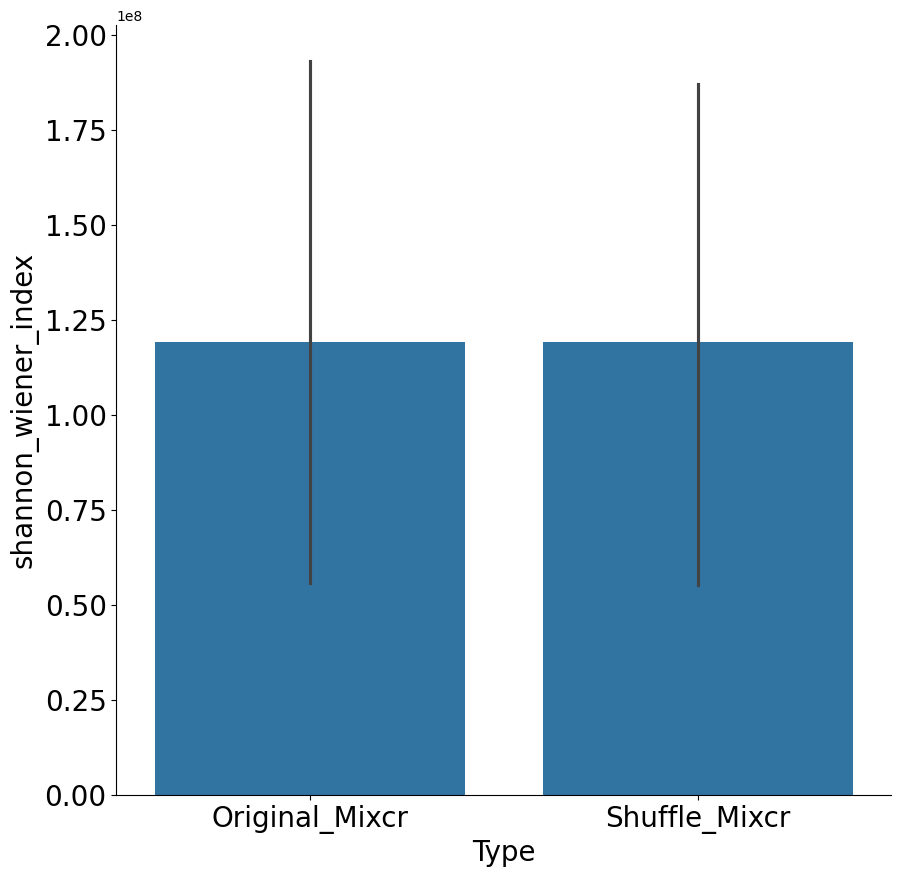

In [22]:
ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x='Type',
                 y='shannon_wiener_index', data=df_combined)

ax.set_xlabel('Type', fontsize=20)
ax.set_ylabel('shannon_wiener_index', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

plt.show()